## Comapre the two Cities - NewYork & Toronto

In [1]:
# import the requiered libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Read both the csv files which has Venues details from each city
TO_City = pd.read_csv("Toronto_Venues_group.csv")
NY_City = pd.read_csv("NewYork_Venue_data.csv")

In [3]:
TO_City.head()

,Neighbourhood,V_Category_Afghan Restaurant,V_Category_Airport,V_Category_Airport Food Court,V_Category_Airport Gate,V_Category_Airport Lounge,V_Category_Airport Service,V_Category_Airport Terminal,V_Category_American Restaurant,V_Category_Antique Shop,...,V_Category_Vegetarian / Vegan Restaurant,V_Category_Video Game Store,V_Category_Video Store,V_Category_Vietnamese Restaurant,V_Category_Warehouse Store,V_Category_Wine Bar,V_Category_Wine Shop,V_Category_Wings Joint,V_Category_Women's Store,V_Category_Yoga Studio
0,Adelaide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,...,0.02,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.0
1,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
2,Agincourt North,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
3,Albion Gardens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
4,Alderwood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [4]:
NY_City.head()

,Neighbourhood,V_Category_Adult Boutique,V_Category_Afghan Restaurant,V_Category_African Restaurant,V_Category_Airport Terminal,V_Category_American Restaurant,V_Category_Antique Shop,V_Category_Arcade,V_Category_Arepa Restaurant,V_Category_Argentinian Restaurant,...,V_Category_Warehouse Store,V_Category_Waste Facility,V_Category_Waterfront,V_Category_Weight Loss Center,V_Category_Whisky Bar,V_Category_Wine Bar,V_Category_Wine Shop,V_Category_Wings Joint,V_Category_Women's Store,V_Category_Yoga Studio
0,Allerton,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arrochar,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
L1 = list(NY_City.columns)
L2 = list(TO_City.columns)
L = list(set(L1).intersection(L2))
print(len(L))
NY_TO_df = pd.merge(NY_City,TO_City,how='outer',on=L)
cols = [col for col in NY_TO_df.columns if col not in L]
DF = NY_TO_df.drop(columns=cols)
DF.head()

236


,Neighbourhood,V_Category_Afghan Restaurant,V_Category_Airport Terminal,V_Category_American Restaurant,V_Category_Antique Shop,V_Category_Art Gallery,V_Category_Arts & Crafts Store,V_Category_Asian Restaurant,V_Category_Athletics & Sports,V_Category_BBQ Joint,...,V_Category_Vegetarian / Vegan Restaurant,V_Category_Video Game Store,V_Category_Video Store,V_Category_Vietnamese Restaurant,V_Category_Warehouse Store,V_Category_Wine Bar,V_Category_Wine Shop,V_Category_Wings Joint,V_Category_Women's Store,V_Category_Yoga Studio
0,Allerton,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arrochar,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.043478,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


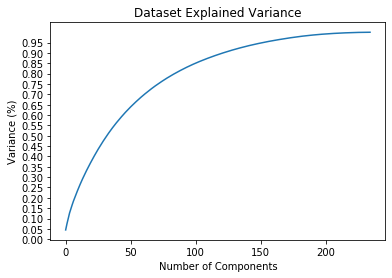

In [7]:
### Implement the Principal Component analysis inorder to reduce dimentionality
x = DF['Neighbourhood']
data = DF.iloc[:,1:]
scaler = MinMaxScaler(feature_range=[0,1])
rescaled = scaler.fit_transform(data)
pca = PCA().fit(rescaled)

#Plotting the Cumulative Summation of the Explained Variance


plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()


In [9]:
## From the above plot, we can use n_cluster=175
pca = PCA(n_components=175)
dataset = pca.fit_transform(rescaled)

In [10]:
dataset

array([[-0.33594376, -0.21439169,  0.00581542, ..., -0.00775406,
         0.02494524, -0.00380677],
       [-0.19682818, -0.09357655, -0.05621057, ...,  0.01970772,
         0.02917522,  0.05719387],
       [-0.39681184, -0.2412771 , -0.06171984, ..., -0.01376957,
         0.02529112,  0.0304529 ],
       ...,
       [-0.18309306,  0.18465493, -0.12255575, ...,  0.02535756,
         0.01546352, -0.00746195],
       [ 0.02990949,  0.31570908, -0.07548252, ...,  0.02177709,
         0.00972415, -0.00628946],
       [-0.05531111, -0.001085  ,  0.01008856, ..., -0.00379886,
         0.02581202, -0.03505888]])

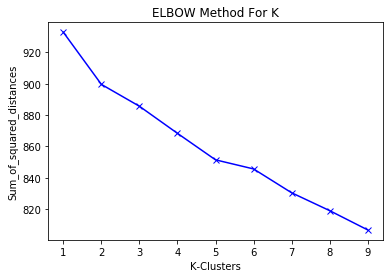

In [11]:
## Find the best number of Clusters by elbow method
from sklearn.cluster import KMeans
Sum_of_squared_distances=[]
K = range(1,10)
for K_value in K:
    KM = KMeans(n_clusters=K_value,init='k-means++',n_init=10,random_state=10).fit(dataset)
    Sum_of_squared_distances.append(KM.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K-Clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('ELBOW Method For K')
plt.show()

### From the above plot its clear that the best value of K is 5. So we will use 5 clusters....

##### lets find the top 10 venues in which we will form the clusters

In [12]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
cols = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        cols.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        cols.append('{}th Most Common Venue'.format(ind+1))
        
DF_NY_TO = pd.DataFrame(columns=cols)
DF_NY_TO['Neighbourhood'] = DF['Neighbourhood']
        
for Neighbour in DF['Neighbourhood']:
#     print('----'+Neighbour+'----')
    temp = DF[DF['Neighbourhood'] == Neighbour].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    temp1 = temp.sort_values('freq', ascending = False).reset_index(drop=True).head(num_top_venues)
    indx = DF[DF['Neighbourhood']== Neighbour].index.values.astype('int')[0]
#     print('\n')
    Cat_names = temp1['venue'].to_list()
    DF_NY_TO.iloc[indx,:].iloc[1:] = Cat_names
DF_NY_TO.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,V_Category_Pizza Place,V_Category_Deli / Bodega,V_Category_Supermarket,V_Category_Spa,V_Category_Pharmacy,V_Category_Fried Chicken Joint,V_Category_Chinese Restaurant,V_Category_Breakfast Spot,V_Category_Grocery Store,V_Category_Gas Station
1,Annadale,V_Category_American Restaurant,V_Category_Pizza Place,V_Category_Pharmacy,V_Category_Park,V_Category_Sports Bar,V_Category_Diner,V_Category_Restaurant,V_Category_Bakery,V_Category_Liquor Store,V_Category_Train Station
2,Arden Heights,V_Category_Pharmacy,V_Category_Pizza Place,V_Category_Playground,V_Category_Coffee Shop,V_Category_Museum,V_Category_Metro Station,V_Category_Mexican Restaurant,V_Category_Middle Eastern Restaurant,V_Category_Miscellaneous Shop,V_Category_Mobile Phone Shop
3,Arlington,V_Category_American Restaurant,V_Category_Deli / Bodega,V_Category_Coffee Shop,V_Category_Afghan Restaurant,V_Category_Music Venue,V_Category_Mexican Restaurant,V_Category_Middle Eastern Restaurant,V_Category_Miscellaneous Shop,V_Category_Mobile Phone Shop,V_Category_Modern European Restaurant
4,Arrochar,V_Category_Pizza Place,V_Category_Italian Restaurant,V_Category_Deli / Bodega,V_Category_Pharmacy,V_Category_Cosmetics Shop,V_Category_Sandwich Place,V_Category_Middle Eastern Restaurant,V_Category_Mediterranean Restaurant,V_Category_Supermarket,V_Category_Liquor Store
5,Arverne,V_Category_Sandwich Place,V_Category_Metro Station,V_Category_Playground,V_Category_Donut Shop,V_Category_Board Shop,V_Category_Thai Restaurant,V_Category_Beach,V_Category_Coffee Shop,V_Category_Bed & Breakfast,V_Category_Pizza Place
6,Astoria,V_Category_Bar,V_Category_Middle Eastern Restaurant,V_Category_Greek Restaurant,V_Category_Seafood Restaurant,V_Category_Mediterranean Restaurant,V_Category_Indian Restaurant,V_Category_Pizza Place,V_Category_Food Truck,V_Category_Dessert Shop,V_Category_Pub
7,Astoria Heights,V_Category_Playground,V_Category_Bakery,V_Category_Pizza Place,V_Category_Plaza,V_Category_Cocktail Bar,V_Category_Shopping Mall,V_Category_Bus Station,V_Category_Supermarket,V_Category_Italian Restaurant,V_Category_Burger Joint
8,Auburndale,V_Category_Deli / Bodega,V_Category_Furniture / Home Store,V_Category_Italian Restaurant,V_Category_Noodle House,V_Category_Bar,V_Category_Fast Food Restaurant,V_Category_Supermarket,V_Category_Discount Store,V_Category_Korean Restaurant,V_Category_Athletics & Sports
9,Bath Beach,V_Category_Pharmacy,V_Category_Sushi Restaurant,V_Category_Bubble Tea Shop,V_Category_Italian Restaurant,V_Category_Pizza Place,V_Category_Fast Food Restaurant,V_Category_Chinese Restaurant,V_Category_Clothing Store,V_Category_Gas Station,V_Category_Burger Joint


#### Create the clusters

In [13]:
KM = KMeans(n_clusters=5,init='k-means++')

In [14]:
## backup of the original dataset
dataset_clustering = dataset.copy()

#Build the model
cluster_data = DF_NY_TO.iloc[:,1:]
model = KM.fit(dataset_clustering)

#checking the KMeans output
centroids = model.cluster_centers_
labels = model.labels_

In [15]:
# Create a backup of the final dataset
Final_DF = DF_NY_TO.copy()

In [16]:
Final_DF.insert(0,'Cluster_Label',labels)
Final_DF.head()

,Cluster_Label,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Allerton,V_Category_Pizza Place,V_Category_Deli / Bodega,V_Category_Supermarket,V_Category_Spa,V_Category_Pharmacy,V_Category_Fried Chicken Joint,V_Category_Chinese Restaurant,V_Category_Breakfast Spot,V_Category_Grocery Store,V_Category_Gas Station
1,4,Annadale,V_Category_American Restaurant,V_Category_Pizza Place,V_Category_Pharmacy,V_Category_Park,V_Category_Sports Bar,V_Category_Diner,V_Category_Restaurant,V_Category_Bakery,V_Category_Liquor Store,V_Category_Train Station
2,4,Arden Heights,V_Category_Pharmacy,V_Category_Pizza Place,V_Category_Playground,V_Category_Coffee Shop,V_Category_Museum,V_Category_Metro Station,V_Category_Mexican Restaurant,V_Category_Middle Eastern Restaurant,V_Category_Miscellaneous Shop,V_Category_Mobile Phone Shop
3,2,Arlington,V_Category_American Restaurant,V_Category_Deli / Bodega,V_Category_Coffee Shop,V_Category_Afghan Restaurant,V_Category_Music Venue,V_Category_Mexican Restaurant,V_Category_Middle Eastern Restaurant,V_Category_Miscellaneous Shop,V_Category_Mobile Phone Shop,V_Category_Modern European Restaurant
4,2,Arrochar,V_Category_Pizza Place,V_Category_Italian Restaurant,V_Category_Deli / Bodega,V_Category_Pharmacy,V_Category_Cosmetics Shop,V_Category_Sandwich Place,V_Category_Middle Eastern Restaurant,V_Category_Mediterranean Restaurant,V_Category_Supermarket,V_Category_Liquor Store


In [17]:
print("The shape of cluster 0: ",Final_DF[Final_DF['Cluster_Label']==0].shape)
print("The shape of cluster 1: ",Final_DF[Final_DF['Cluster_Label']==1].shape)
print("The shape of cluster 2: ",Final_DF[Final_DF['Cluster_Label']==2].shape)
print("The shape of cluster 3: ",Final_DF[Final_DF['Cluster_Label']==3].shape)
print("The shape of cluster 4: ",Final_DF[Final_DF['Cluster_Label']==4].shape)

The shape of cluster 0:  (5, 12)
The shape of cluster 1:  (96, 12)
The shape of cluster 2:  (187, 12)
The shape of cluster 3:  (5, 12)
The shape of cluster 4:  (207, 12)


In [18]:
### Appending the NewYork and Toronto datasets with the cluster labels
NY_DATA_DF = pd.read_csv("NY_city_Neighbour_Lat_Lng.csv")
TO_DATA_DF = pd.read_csv("TOR_city_Neighbour_Lat_Lng.csv")

## replace the Neighbourhood which were duplicate in the NewYork and Toronto dataset
NY_DATA_DF.replace(to_replace=('Bedford Park','Chinatown','Riverdale','Rosedale','Yorkville'),value=('Bedford Park_TO','Chinatown_TO','Riverdale_NY','Rosedale_NY','Yorkville_NY'),inplace=True)
TO_DATA_DF.replace(to_replace=('Bedford Park','Chinatown','Riverdale','Rosedale','Yorkville'),value=('Bedford Park_TO','Chinatown_TO','Riverdale_TO','Rosedale_TO','Yorkville_TO'),inplace=True)
NY_City_Merged = NY_DATA_DF.merge(Final_DF[['Cluster_Label','Neighbourhood']],how='left',on='Neighbourhood')
TO_City_Merged = TO_DATA_DF.merge(Final_DF[['Cluster_Label','Neighbourhood']],how='left',on='Neighbourhood')

In [21]:
NY_City_Merged.head()

,Borough,Neighbourhood,Latitude,Longitude,Cluster_Label
0,Bronx,Wakefield,40.894705,-73.847201,4.0
1,Bronx,Co-op City,40.874294,-73.829939,4.0
2,Bronx,Eastchester,40.887556,-73.827806,4.0
3,Bronx,Fieldston,40.895437,-73.905643,2.0
4,Bronx,Riverdale_NY,40.890834,-73.912585,2.0


In [22]:
## Get the geocoroinates for NY and Toronto
from geopy.geocoders import Nominatim
address_NY = 'New York City,NY'
address_TO = 'Toronto,Toronto'
geolocator = Nominatim(user_agent='ny_explorer')
location = geolocator.geocode(address_NY)
lat_NY = location.latitude
lng_NY = location.longitude
geolocator = Nominatim(user_agent='ny_explorer')
location = geolocator.geocode(address_TO)
lat_TO = location.latitude
lng_TO = location.longitude
print(f"The Coordinates of NY are [Lat:LNG] {lat_NY} : {lng_NY}")
print(f"The Coordinates of TO are [Lat:LNG] {lat_TO} : {lng_TO}")

The Coordinates of NY are [Lat:LNG] 40.7127281 : -74.0060152
The Coordinates of TO are [Lat:LNG] 43.653963 : -79.387207


In [23]:
# Map the neighbours from NY and Toronto on world map using Folium..
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
kclusters = 5
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_ny = folium.Map(location=(lat_NY,lng_NY),zoom_start=10)

# Add marker to the NY map
for Borough, Neighbour,lat,lng,CL in zip(NY_City_Merged['Borough'],NY_City_Merged['Neighbourhood'],NY_City_Merged['Latitude'],NY_City_Merged['Longitude'],NY_City_Merged['Cluster_Label']):
    label = '{},{}'.format(Neighbour,Borough)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
            [lat,lng],radius=5,popup=label,color=rainbow[int(CL)-1],fill_color=rainbow[int(CL)-1],fill=True,fill_opacity=0.7,
             parse_html=False).add_to(map_ny)

map_ny

In [25]:
map_TO = folium.Map(location=(lat_TO,lng_TO),zoom_start=10)

# Add marker to the NY map
for Borough, Neighbour,lat,lng,CL in zip(TO_City_Merged['Borough'],TO_City_Merged['Neighbourhood'],TO_City_Merged['Latitude'],TO_City_Merged['Longitude'],TO_City_Merged['Cluster_Label']):
    label = '{},{}'.format(Neighbour,Borough)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
            [lat,lng],radius=5,popup=label,color=rainbow[int(CL)-1],fill_color=rainbow[int(CL)-1],fill=True,fill_opacity=0.7,
             parse_html=False).add_to(map_TO)

map_TO